In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fancyimpute import mice
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

Using TensorFlow backend.


In [2]:
pd.set_option('display.float_format',lambda x:'%.4f'%x)

df_train_x = pd.read_csv('../data/train_values_6tLXv3T.csv', encoding='utf8')
df_test_x = pd.read_csv('../data/test_values_K7FqC54.csv', encoding='utf8')
df_train_y = pd.read_csv('../data/train_labels.csv', encoding='utf8')
df_test_y = pd.read_csv('../data/submission_format_klDJt5C.csv', encoding='utf8')

In [3]:
data_describe1 = pd.read_csv('train_x_describe.csv', index_col=0)
data_describe2 = pd.read_csv('test_x_describe.csv', index_col=0)

### df_train_x drop columns if the missing value is over 40%

In [11]:
# df_train_x: 
data_describe1[data_describe1['null_rate']>0.4]

,duplicate,is_null,null_number,null_rate
droughts_floods_extreme_temps,76,True,1326,0.9465
inequality_index,430,True,972,0.6938
adult_literacy_rate,286,True,1116,0.7966
school_enrollment_rate_female,796,True,606,0.4325
rail_lines_density,450,True,944,0.6738


In [5]:
# df_test_x: 
data_describe2[data_describe2['null_rate']>0.4]

,duplicate,is_null,null_number,null_rate
droughts_floods_extreme_temps,35,True,582,0.9448
inequality_index,140,True,477,0.7744
tax_revenue_share_gdp,367,True,250,0.4058
adult_literacy_rate,108,True,509,0.8263
rail_lines_density,197,True,420,0.6818


In [6]:
# use training data to deside which columns should be drroped
drop_col = list(data_describe1[data_describe1['null_rate']>0.4].index)

In [7]:
df_train_x.drop(drop_col, axis=1, inplace=True)
df_train_x.shape

(1401, 41)

In [ ]:
#take out the columns that have less than 0.2 correlation with prevalence_of_undernourishment
df_new=pd.DataFrame(df_train_x.iloc[:,:2])
for i in df.columns[2:]:
    if abs(df_train_x['prevalence_of_undernourishment'].corr(df_train_x[i])) >0.2:
        df_new[i]=df_train_x[i]
df_new.shape

In [8]:
def fill_ii(df):
    df_new=df.iloc[:,2:]
    df_filled_ii = pd.DataFrame(IterativeImputer().fit_transform(df_new.as_matrix()))
    df_filled_ii.columns = df_new.columns
    df_filled_ii.index = df_new.index

    return df_filled_ii


def fill_knn(df):
    df_new=df.iloc[:,2:]
    df_filled_knn =pd.DataFrame(KNN(k=5).fit_transform(df_new.as_matrix()))
    df_filled_knn.columns = df_new.columns
    df_filled_knn.index = df_new.index

    return df_filled_knn

In [9]:
# use KNN method to filled the null values

df_filled_knn = fill_knn(df_train_x)
df_filled_knn['country_code'] = df_train_x['country_code']

c:\users\student\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Imputing row 1/1401 with 3 missing, elapsed time: 0.603
Imputing row 101/1401 with 0 missing, elapsed time: 0.610
Imputing row 201/1401 with 5 missing, elapsed time: 0.616
Imputing row 301/1401 with 0 missing, elapsed time: 0.623
Imputing row 401/1401 with 0 missing, elapsed time: 0.628
Imputing row 501/1401 with 1 missing, elapsed time: 0.635
Imputing row 601/1401 with 1 missing, elapsed time: 0.642
Imputing row 701/1401 with 2 missing, elapsed time: 0.649
Imputing row 801/1401 with 0 missing, elapsed time: 0.655
Imputing row 901/1401 with 1 missing, elapsed time: 0.661
Imputing row 1001/1401 with 4 missing, elapsed time: 0.667
Imputing row 1101/1401 with 2 missing, elapsed time: 0.673
Imputing row 1201/1401 with 2 missing, elapsed time: 0.680
Imputing row 1301/1401 with 18 missing, elapsed time: 0.686
Imputing row 1401/1401 with 0 missing, elapsed time: 0.692


Text(0.5, 1.0, 'Correlation between features')

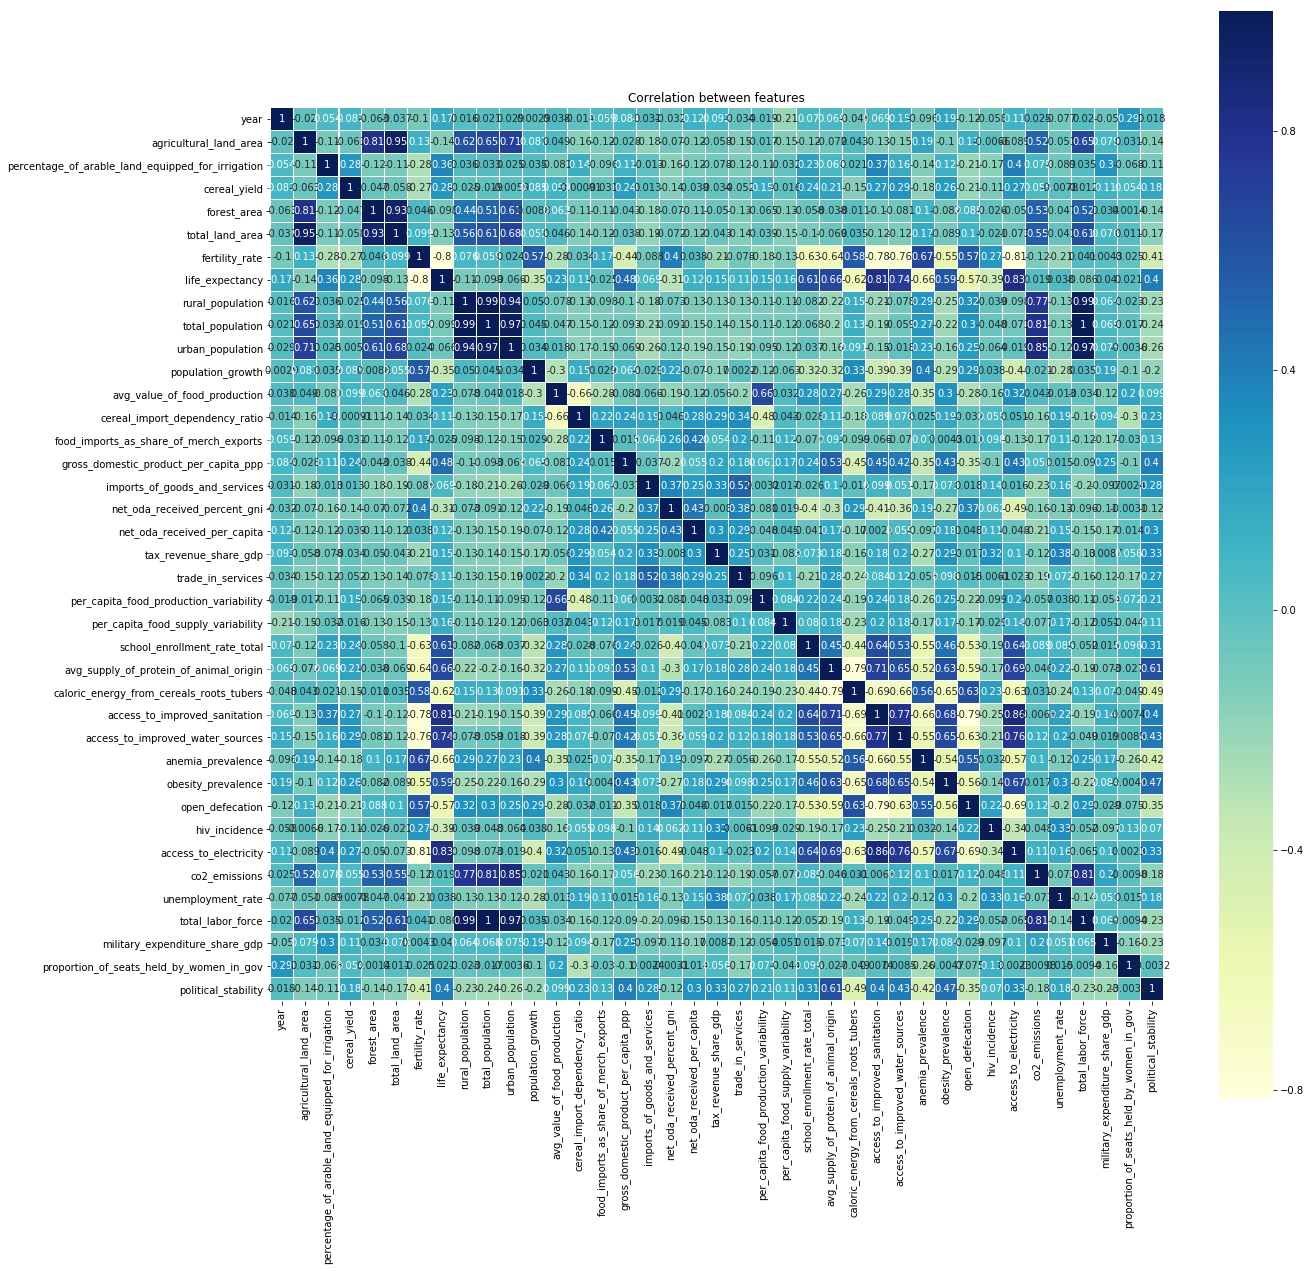

In [12]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

g=sns.heatmap(df_filled_knn.corr(), vmax=1, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')